# Task 2 : Prediction using Unsupervised ML
### Goal : predict the optimum number of  clusters and represent it visually.

### 1. Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### 2. Loading the dataset & inspecting.

In [2]:
df = pd.read_csv('Iris.csv')
df = df.iloc[:, 1:5]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 3. Getting the training values.

In [3]:
X = df.iloc[:, :].values
X.shape

(150, 4)

### 4. Iterating upto 11 neighbors to find the optimal one. 

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

### 5. Visualizing to find the optimal value of cluster.

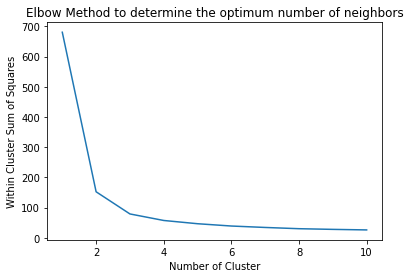

In [5]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method to determine the optimum number of neighbors')
plt.xlabel('Number of Cluster')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

### We can see, 3 is the optimal number for number of clusters.

### 6. Visualizing the clusters, on the first three columns

In [6]:
kmeans = KMeans(init='k-means++', n_clusters = 3, max_iter=500, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

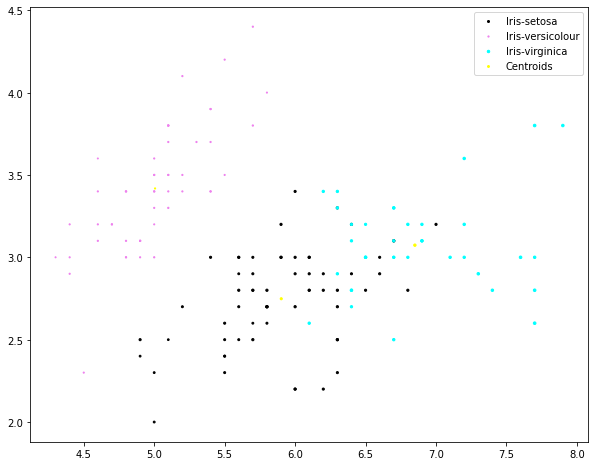

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], X[y_kmeans == 0,2], c='black', label = 'Iris-setosa', edgecolors='black')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], X[y_kmeans == 1,2], 
c='violet',label = 'Iris-versicolour', edgecolors='violet')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], X[y_kmeans == 2,2], 
c='cyan',label = 'Iris-virginica', edgecolors='cyan')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='yellow', label = 'Centroids', edgecolors='yellow')
plt.legend()
plt.show()